In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use("nbagg")
from matplotlib import gridspec


from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# parameters

nx=500
dx=1
nz=nx
dz=dx

nt=1000
dt=0.001

#source location
isrcx=150*dx     #in metres
isrcz=100*dz   

c0=500


cfl=c0*dt/dx

print("stability criteria="+ str(cfl))

stability criteria=0.5


<IPython.core.display.Javascript object>


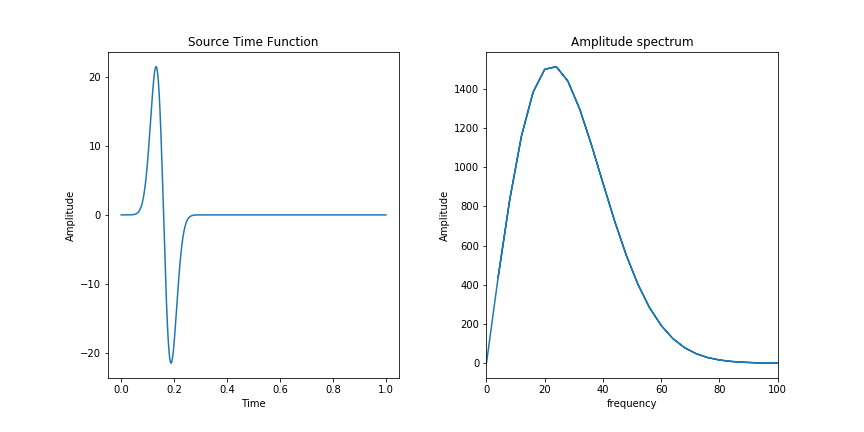

Text(0, 0.5, 'Amplitude')

In [3]:
# defining source wavelet
f0=25.0
t0=4.0/f0
src=np.zeros(nt+1)
time=np.linspace(0,nt*dt,nt)
src=-2. * (time - t0) * (f0 ** 2) * (np.exp(-1.0 * (f0 ** 2) * (time - t0) ** 2))
plt.ion()
fig1=plt.figure(figsize=[12,6])
gsp1=gridspec.GridSpec(1,2,width_ratios=[1,1], hspace=0.3, wspace=0.3)

ax1=plt.subplot(gsp1[0])
ax1.plot(time,src)
ax1.set_title("Source Time Function")
ax1.set_xlabel("Time")
ax1.set_ylabel("Amplitude")

spectrum=np.fft.fft(src)
frequency=np.fft.fftfreq(spectrum.size,d=dt/4.0)


ax2=plt.subplot(gsp1[1])
ax2.plot(np.abs(frequency),np.abs(spectrum))
ax2.set_xlim(0,100)
ax2.set_title("Amplitude spectrum")
ax2.set_xlabel("frequency")
ax2.set_ylabel("Amplitude")



<IPython.core.display.Javascript object>


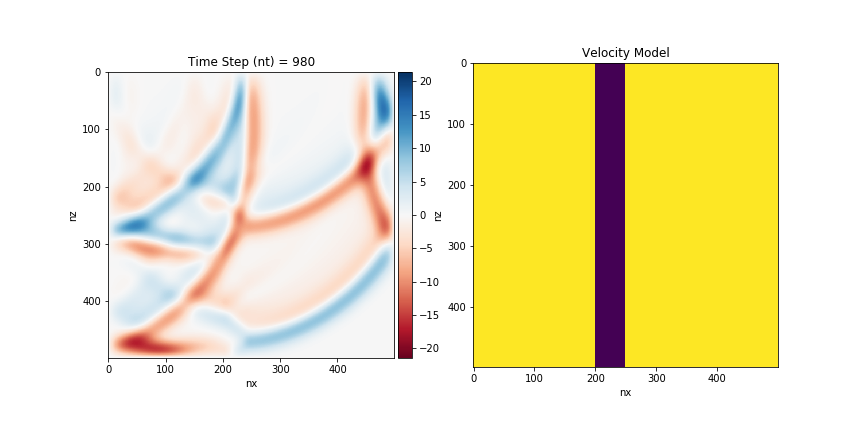

Text(0, 0.5, 'nz')

In [14]:
p=np.zeros((nz,nx))
pold=np.zeros((nz,nx))
pnew=np.zeros((nz,nx))
d2pz = np.zeros((nz,nx))
d2px = np.zeros((nz,nx))
c    = np.zeros((nz,nx))
model="fault"


if model=="low_velocity_zone":
    c = c + c0
    c[100:150,:]=0.6*c0
    
elif model=="topography":
    c+=c0
    c[0:50,0:50]=0.0
    c[0:80,50:150]=0.0
    c[0:72,150:270]=0.0
    c[0:90,270:350]=0.0
elif model=="sedimentary_layer":
    c+=c0
    c[0:70,:]=0.7*c0
    c[70:100,:]=0.78*c0
    c[100:150,:]=0.85*c0
    c[150:220,:]=0.95*c0
    c[340:400,:]=1.05*c0
    c[400:499,:]=1.15*c0
elif model=="fault":
    c+=c0
    c[:,200:250]=0.78*c0
else:
    c+=c0


    




v = max([np.abs(src.min()), np.abs(src.max())])

plt.ion()

fig2=plt.figure(figsize=[12,6])
gsp2=gridspec.GridSpec(1,2)
ax3=plt.subplot(gsp2[0])
im1=ax3.imshow(p, vmin=-v, vmax=+v,interpolation="nearest", cmap=plt.cm.RdBu)

div  = make_axes_locatable(ax3)
cax  = div.append_axes("right", size="5%", pad=0.05) # size & position of colorbar
fig2.colorbar(im1, cax=cax) # plot colorbar

ax3.set_title('Time Step (nt) = 0')
#ax3.set_xlim(0, nx)
#ax3.set_ylim(0, nz)
ax3.set_xlabel('nx')
ax3.set_ylabel('nz')

ax4=plt.subplot(gsp2[1])
# The velocity model is influenced by the Earth model above
plt.title('Velocity Model')
plt.imshow(c)
ax4.set_xlabel('nx')
ax4.set_ylabel('nz')




In [15]:
for it in range(nt):
    for i in range(1,nx-1):
        d2pz[i,:]=(p[i+1,:]-2*p[i,:]+p[i-1,:])/dx**2
    for j in range(1,nz-1):
        d2px[:,j]=(p[:,j+1]-2*p[:,j]+p[:,j-1])/dz**2
    
    pnew=2 * p - pold + (c ** 2) * (dt ** 2) * (d2pz + d2px)    
    pnew[isrcz, isrcx] = pnew[isrcz, isrcx] + src[it] / (dx * dz) * (dt ** 2) 
    pold, p = p, pnew
    
    idisp = 20 # display frequency
    if (it % idisp) == 0:
        ax3.set_title('Time Step (nt) = %d' % it)
        ax3.imshow(p,vmin=-0.00001, vmax=+0.00001,  interpolation="nearest", cmap=plt.cm.RdBu)
        plt.gcf().canvas.draw()
    
    
    
    
    
    